##### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
telecomdf=pd.read_csv("Telecom Churn Data SingTel.csv")

In [10]:
telecomdf.info()
# If Any of the columns have Non-Null less tha total entires
# then we have missing values. Here we don't have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State                           5000 non-null   object 
 1   Account Length                  5000 non-null   int64  
 2   Area Code                       5000 non-null   int64  
 3   Phone Number                    5000 non-null   object 
 4   International Plan              5000 non-null   object 
 5   Voice mail Plan                 5000 non-null   object 
 6   Num of Voice mail Messages      5000 non-null   int64  
 7   Total Day Minutes               5000 non-null   float64
 8   Total Day Calls                 5000 non-null   int64  
 9   Total day Charge                5000 non-null   float64
 10  Total Eve Minutes               5000 non-null   float64
 11  Total Eve Calls                 5000 non-null   int64  
 12  Total Eve Charge                50

In [12]:
telecomdf.head(3)

,State,Account Length,Area Code,Phone Number,International Plan,Voice mail Plan,Num of Voice mail Messages,Total Day Minutes,Total Day Calls,Total day Charge,...,Total Eve Calls,Total Eve Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total International Minutes,Total Intl Calls,Total Intl Charge,Number Customer Service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [14]:
telecomdf.tail(3)

,State,Account Length,Area Code,Phone Number,International Plan,Voice mail Plan,Num of Voice mail Messages,Total Day Minutes,Total Day Calls,Total day Charge,...,Total Eve Calls,Total Eve Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total International Minutes,Total Intl Calls,Total Intl Charge,Number Customer Service calls,Churn
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.9,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False.
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.1,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False.
4999,VT,86,415,373-8058,no,yes,34,129.4,102,22.0,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,False.


In [16]:
telecomdf.columns

Index(['State', 'Account Length', 'Area Code', 'Phone Number',
       'International Plan', 'Voice mail Plan', 'Num of Voice mail Messages',
       'Total Day Minutes', 'Total Day Calls', 'Total day Charge',
       'Total Eve Minutes', 'Total Eve Calls', 'Total Eve Charge',
       'Total Night Minutes', 'Total Night Calls ', 'Total Night Charge',
       'Total International Minutes', 'Total Intl  Calls', 'Total Intl Charge',
       'Number Customer Service calls ', 'Churn'],
      dtype='object')

In [20]:
print(telecomdf[['Account Length','Number Customer Service calls ']].describe())

       Account Length  Number Customer Service calls 
count      5000.00000                     5000.000000
mean        100.25860                        1.570400
std          39.69456                        1.306363
min           1.00000                        0.000000
25%          73.00000                        1.000000
50%         100.00000                        1.000000
75%         127.00000                        2.000000
max         243.00000                        9.000000


In [54]:
# Get details using Numeric Indexing and desciptive statistics
print(telecomdf.iloc[:,[1,19]].describe())

       Account Length  Number Customer Service calls 
count      5000.00000                     5000.000000
mean        100.25860                        1.570400
std          39.69456                        1.306363
min           1.00000                        0.000000
25%          73.00000                        1.000000
50%         100.00000                        1.000000
75%         127.00000                        2.000000
max         243.00000                        9.000000


In [56]:
print("Skewness : " , telecomdf[['Account Length','Number Customer Service calls ']].skew())
print("Kurtosis : " , telecomdf[['Account Length','Number Customer Service calls ']].kurtosis())

Skewness :  Account Length                    0.109291
Number Customer Service calls     1.042462
dtype: float64
Kurtosis :  Account Length                   -0.101621
Number Customer Service calls     1.481096
dtype: float64


In [83]:
# Frequency Counts if the variable is in Non Numeric format.
# Numeric format then we can do descriptive statistics
# Number of customer lines from each state
telecomdf['State'].value_counts()

State
WV    158
MN    125
AL    124
ID    119
VA    118
OH    116
TX    116
WY    115
NY    114
OR    114
NJ    112
UT    112
WI    106
MI    103
ME    103
MA    103
MD    102
VT    101
MT     99
RI     99
KY     99
MS     99
CT     99
KS     99
WA     98
IN     98
CO     96
NH     95
DE     94
MO     93
AR     92
NM     91
NC     91
SC     91
FL     90
NV     90
OK     90
TN     89
AZ     89
DC     88
IL     88
NE     88
ND     88
HI     86
SD     85
GA     83
LA     82
PA     77
AK     72
IA     69
CA     52
Name: count, dtype: int64

In [69]:
telecomdf.Churn.value_counts()
# 4293 customers still having connection
# 707 customers left

Churn
False.    4293
True.      707
Name: count, dtype: int64

In [75]:
# How many customers have international plans
telecomdf['International Plan'].value_counts()
# 473 customers have taken international plan. 4527 customers didn't take international plan

International Plan
no     4527
yes     473
Name: count, dtype: int64

In [81]:
# How many customers have subscribed to voice mail plans 
telecomdf['Voice mail Plan'].value_counts()
# 1323 customers have subscribed to Voice mail Plan. 3677 customers didn't subscribed to Voice mail Plan

Voice mail Plan
no     3677
yes    1323
Name: count, dtype: int64

In [97]:
# Cross tabulation - Frequency count of two variables
# How many customers who have taken international plan left the connection
pd.crosstab(telecomdf.Churn, telecomdf['International Plan'])
# 199 customers with international plan left the connection
# 599 customers who left the connection didn't take the international plan

International Plan,no,yes
Churn,,
False.,4019,274
True.,508,199


In [101]:
pd.crosstab(telecomdf.Churn, telecomdf['Voice mail Plan'])
# 102 customers with Voice mail Plan left the connection
# 1221 customers who left the connection didn't take the Voice mail Plan

Voice mail Plan,no,yes
Churn,,
False.,3072,1221
True.,605,102


In [138]:
import warnings
warnings.filterwarnings("ignore")

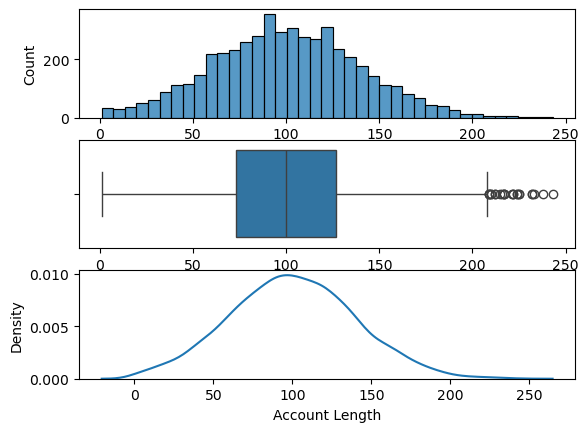

In [140]:
# seaborn is a Visualization lbrary part of matplotlib
import seaborn as sns
fis,ax=plt.subplots(3,1)
sns.histplot(telecomdf.iloc[:,1],ax=ax[0])
sns.boxplot(telecomdf.iloc[:,1],ax=ax[1], orient="h")
sns.kdeplot(telecomdf.iloc[:,1],ax=ax[2])
plt.show()
# Its a bell curve, close to normal distribution

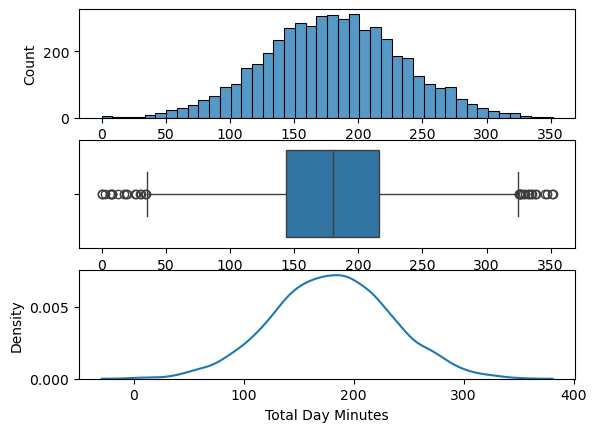

In [142]:
# seaborn is a Visualization lbrary part of matplotlib
import seaborn as sns
fis,ax=plt.subplots(3,1)
sns.histplot(telecomdf.iloc[:,7],ax=ax[0])
sns.boxplot(telecomdf.iloc[:,7],ax=ax[1], orient="h")
sns.kdeplot(telecomdf.iloc[:,7],ax=ax[2])
plt.show()
# Its a bell curve, close to normal distribution

##### Aggregation based on condition

In [170]:
# Average Customer Service calls by Chrun
telecomdf['Number Customer Service calls '].groupby(telecomdf.Churn).mean()

Churn
False.    1.457722
True.     2.254597
Name: Number Customer Service calls , dtype: float64

In [172]:
# Average Account Length by Chrun
# First numeric variable followed by categorical variable
telecomdf['Account Length'].groupby(telecomdf.Churn).mean()

Churn
False.     99.917074
True.     102.332390
Name: Account Length, dtype: float64